<center><h1>Mining Twitter Data Using Python / Tweepy</h1></center>

## Main script that parses the stream of tweets based on a filter word

In [ ]:
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

#Variables that contains the user credentials to access Twitter API 
access_token = "your_access_token"
access_token_secret = "your_access_secret_token"
consumer_key = "your_consumer_key"
consumer_secret = "your_consumer_secret"


#This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):

    def on_data(self, data):
        print(data)
        return True

    def on_error(self, status):
        print(status)


if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)

    #This line filter Twitter Streams to capture data by the keywords: 'honda'
    stream.filter(track=['honda'])

### Then from your terminal, execute this script with output piped to a text file: your_script.py > tweets_data.txt

# Then run this script below to create a Python dataframe of the tweets data

In [149]:
%matplotlib inline
import json
import pandas as pd
import matplotlib.pyplot as plt
from os import path
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",20)
pd.set_option("display.max_colwidth",150)

d = path.dirname('/home/pybokeh/temp/')
#text = open(path.join(d, 'twitter_data.txt')).read()

tweets_data = []
tweets_file = open(path.join(d, 'honda_heritage.txt'),'r')
for line in tweets_file:
    try:
        tweet = json.loads(line)
        if len(tweet) > 10:            # Ensure json data is complete
            tweets_data.append(tweet)
    except:
        continue

print(len(tweets_data))

4482


### Create pandas dataframe

In [150]:
tweets = pd.DataFrame()
tweets['text']      = [tweet['text'].lower() for tweet in tweets_data]
tweets['lang']      = [tweet['lang'] for tweet in tweets_data]
tweets['sample']      = [tweet['text'][:20] for tweet in tweets_data]
tweets['retweeted'] = [tweet['retweeted'] for tweet in tweets_data]

### Let's remove redundand tweets, retweets, duplicates, and limit to English tweets

In [151]:
english_tweets = tweets[(tweets['lang']=='en') & (tweets['retweeted']==False)]

In [152]:
english_tweets = english_tweets.drop_duplicates(subset='sample');

In [153]:
text = ''
for line in english_tweets['text']:
    text = text + ' ' + line.replace("'s", " ")

## Now create the word cloud

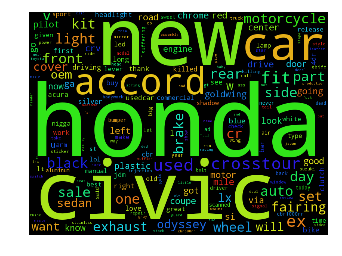

In [154]:
%matplotlib inline
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
d = path.dirname('/home/pybokeh/Downloads/')
# Read the whole text.
#text = strWords
#text = open(path.join(d, 'alice.txt')).read()

additional_words = [
    'rt',
    'ebay',
    't',
    'https',
    'co',
    't',
    'amp',
    's',
    'tcot',
    'de'
]

for word in additional_words:
    STOPWORDS.add(word)

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
#honda_mask = imread(path.join(d, "honda_logo_mask.png"), flatten=True)
#wc = WordCloud(background_color="black", max_words=2000, mask=honda_mask, stopwords=STOPWORDS)

wc = WordCloud(width=800, height=600).generate(text)

# store to file
wc.to_file(path.join(d, "civic.png"))

# show
plt.imshow(wc)
plt.axis("off")
#plt.figure()
#plt.imshow(honda_mask, cmap=plt.cm.gray)
#plt.axis("off")
plt.show()

### What caught my eye was that "crosstour" was the 6th most mentioned word, which is interesting since quite frankly, the Crosstour is not a very popular Honda model.

In [155]:
wc.process_text(text)[:50]

[('honda', 1.0),
 ('civic', 0.15656229180546302),
 ('new', 0.15456362425049966),
 ('car', 0.07861425716189208),
 ('accord', 0.072618254497002),
 ('crosstour', 0.057961359093937376),
 ('fit', 0.049966688874083946),
 ('ex', 0.037308461025982675),
 ('used', 0.03397734843437708),
 ('motorcycle', 0.03264490339773484),
 ('rear', 0.031978680879413725),
 ('black', 0.030646235842771485),
 ('auto', 0.029980013324450366),
 ('v', 0.029980013324450366),
 ('sale', 0.029313790806129246),
 ('light', 0.02798134576948701),
 ('set', 0.02798134576948701),
 ('front', 0.02731512325116589),
 ('kit', 0.02731512325116589),
 ('day', 0.02664890073284477),
 ('cr', 0.02664890073284477),
 ('part', 0.02598267821452365),
 ('brake', 0.02598267821452365),
 ('one', 0.023984010659560292),
 ('side', 0.022651565622918056),
 ('fairing', 0.021319120586275817),
 ('exhaust', 0.019986675549633577),
 ('wheel', 0.019320453031312457),
 ('odyssey', 0.019320453031312457),
 ('w', 0.019320453031312457),
 ('lx', 0.018654230512991338),


### So...let's see what the hoopla is about with the Crosstour

In [156]:
tweets = pd.DataFrame()
tweets['text']      = [tweet['text'].lower() for tweet in tweets_data]
tweets['lang']      = [tweet['lang'] for tweet in tweets_data]
tweets['sample']      = [tweet['text'][:20] for tweet in tweets_data]
tweets['retweeted'] = [tweet['retweeted'] for tweet in tweets_data]
english_tweets = tweets[(tweets['lang']=='en') & (tweets['retweeted']==False)]
english_tweets = english_tweets.drop_duplicates(subset='sample')
english_tweets = english_tweets[english_tweets['text'].str.contains('crosstour')]

### Oooo...it turns out Honda is ending production of the Crosstour.  Now it makes sense why Crosstour was getting a lot of tweets

In [158]:
english_tweets

,text,lang,sample,retweeted
19,it's official: honda kills crosstour as new suvs take over http://t.co/mcym7t1onq http://t.co/5rybfblfkl,en,It's Official: Honda,False
24,honda killing off crosstour in big production shift http://t.co/frjmtz22of,en,Honda killing off Cr,False
60,bad news everyone. the honda crosstour is dead http://t.co/fyg4r70hhe http://t.co/gge5pkimk7,en,Bad news everyone. T,False
61,end of the road for honda crosstour http://t.co/6dokzagnh1 http://t.co/vojtnxqgdj,en,End of the road for,False
99,rt @jalopnik: bad news everyone. the honda crosstour is dead http://t.co/fyg4r70hhe http://t.co/gge5pkimk7,en,RT @Jalopnik: Bad ne,False
156,"dtn autos: honda to drop crosstour, move accord hybrid output to japan: honda will stop producing the crosstou... http://t.co/oxogaj44tv",en,DTN Autos: Honda to,False
203,"ну такое ""@jalopnik: bad news everyone. the honda crosstour is dead http://t.co/jam0xnttij http://t.co/peeturoqba""",en,"Ну такое ""@Jalopnik:",False
297,"honda to drop crosstour, move accord hybrid output to japan: honda will stop producing the crosstour, a… http://t.co/wmnb3welc7",en,Honda to drop Crosst,False
329,#rt honda killing off crosstour in big production shift: the hatchback never caught on with consumers\n... http://t.co/ui63andlwn #follow,en,#rt Honda killing of,False
394,"dead: honda crosstour: the honda crosstour , one of the homeliest vehicles on the road and a sad sub... http://t.co/a5eybhf5xd #automcza",en,Dead: Honda Crosstou,False
